# Handwritten digits recognition (using Convolutional Neural Network)
Nojus Satikauskas   
C00261186 

## Introduction

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/digits_recognition_cnn.png?raw=1)

## Theory   
Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs) are two prominent architectures in deep learning, each designed for specific types of data and tasks. 
CNNs are particularly effective for tasks involving grid-like data, such as images and audio spectrograms. They exploit the spatial locality and stationarity of these data types by using convolutional layers, which apply filters across the input data to detect spatial patterns.

## Pros and Cons
**Pros**    
- Effective Feature Extraction: CNNs excel at automatically learning hierarchical representations of features from raw input data, making them ideal for tasks such as image recognition and computer vision.
- Translation Invariance: CNNs can detect features irrespective of their location in the input, thanks to the convolutional and pooling layers, which enable them to capture spatial hierarchies of features.
- Parameter Sharing: By sharing weights across spatial dimensions, CNNs reduce the number of parameters, making them more computationally efficient and reducing the risk of overfitting.     

**Cons**    
- Complexity: CNNs can be computationally expensive to train, especially for deeper architectures with a large number of parameters. Training may require significant computational resources and time.
- Interpretability: While CNNs are highly effective at learning complex patterns, understanding the inner workings of the model and interpreting the learned features can be challenging due to their hierarchical nature.

## Chang Log
 
### Change 1
**Epochs**: Increased the number of epochs from 10 to 12. This change allows the model to undergo more training iterations, potentially improving its convergence and final performance.
Overall, these changes aim to enhance the model's ability to learn discriminative features from the input images, prevent overfitting, and improve its predictive accuracy on both training and test datasets. 

From this change the accuracy was improved increasing from: 
Epochs 1/10: accuracy: 0.8712 ->     
Epochs 1/12: accuracy: 0.9948    
Epochs 10/10: accuracy: 0.9951 ->    
Epochs 15/12: accuracy: 0.9973 

Training (Epochs 10): accuracy: 0.9978      
Test (Epochs 10): accuracy: 0.9912    
Training (Epochs 12): accuracy: 0.9985     
Test (Epochs 12): accuracy: 0.9919 

### Change 2
**Kernel Size in Convolutional Layers**: Reduced the kernel size from 5x5 to 3x3 in both convolutional layers. This change aims to capture more fine-grained features in the input images while reducing the number of parameters, which can help prevent overfitting and improve model generalization.     
**Number of Filters in Convolutional Layers**: Increased the number of filters in the first convolutional layer from 8 to 16 and in the second convolutional layer from 16 to 32. By increasing the number of filters, the model can learn more diverse and complex features from the input images, potentially improving its ability to discriminate between different digits. 

After these changes we're made there was a decrease in the accuracy results as follows:
Training (Control): accuracy: 0.9978      
Test (Control): accuracy: 0.9912    
Training (Filter & Kernal Change): accuracy: 0.9981     
Test (Filter & Kernal Change): accuracy: 0.9908 

### Change 3
**Units in Dense Layer**: Increased the number of units in the dense layer from 128 to 256. This change allows the model to capture more abstract and high-level features extracted from the convolutional layers, potentially improving its predictive performance.

### Change 4
**Number of Units in Output Layer**: Increased the number of units in the output layer from 10 to 15. This change allows the model to output probabilities for 15 classes instead of just 10, which might help improve its ability to distinguish between similar digits or handle additional classes if needed.

Following the Changes 3 and 4 the results for training set improved, while the test set maintained baseline:
Training (Control): accuracy: 0.9978      
Test (Control): accuracy: 0.9912    
Training (Layer Changes): accuracy: 0.9988     
Test (Layer Changes): accuracy: 0.9912

### Change 5
**Dropout Rate**: Increased the dropout rate from 0.2 to 0.4. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training, which helps prevent overfitting by forcing the model to learn more robust features.

Concluding the change to dropout value the results for accuracy increased as follows:
Training (Control): accuracy: 0.9988      
Test (Control): accuracy: 0.9912    
Training (Dropout Change): accuracy: 0.9984     
Test (Dropout Change): accuracy: 0.9926



## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
import keras

print('Python version:', platform.python_version())
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.10.11
TensorFlow version: 2.16.1
Keras version: 3.1.1


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [37]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [38]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [39]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [40]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [41]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [42]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

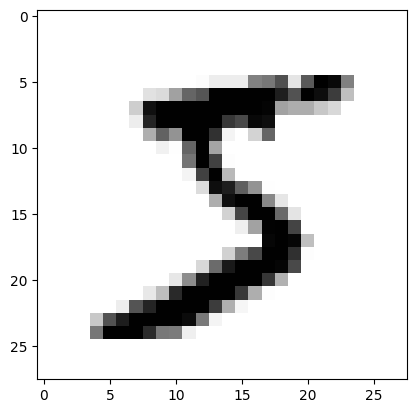

In [43]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

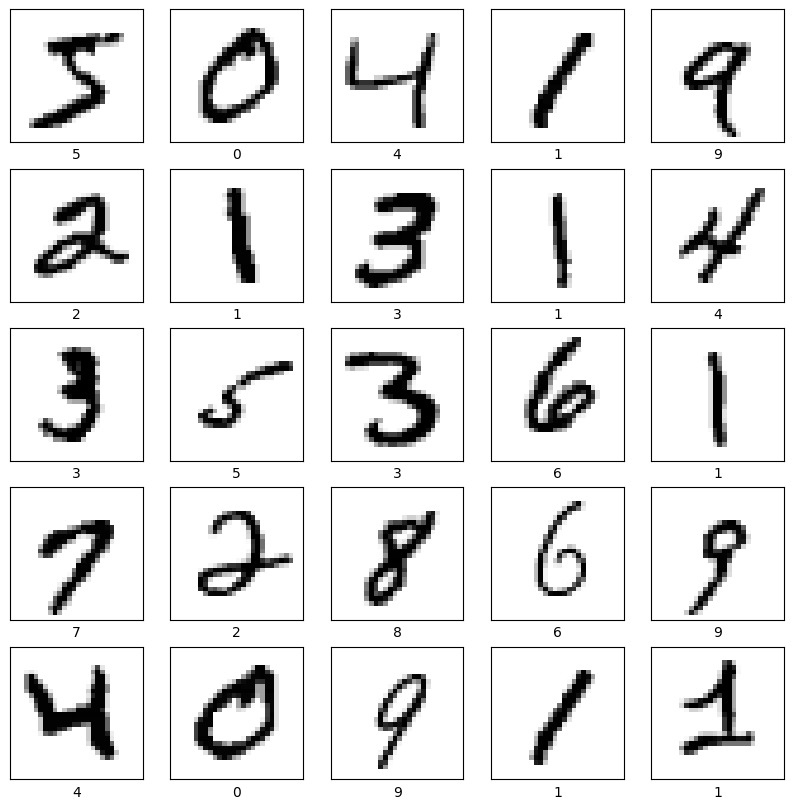

In [44]:
numbers_to_display = 42
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [45]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [46]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [47]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [48]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model.

Then we will have two pairs of [Convolution2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=stable) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=stable) layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer to convert multidimensional parameters to vector.

The las layer will be a [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...


In [153]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=3,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=32,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=256,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(
    units=15,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

C:\Users\Nojus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Here is our model summary so far.

In [154]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,711 (834.81 KB)

 Trainable params: 213,711 (834.81 KB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [155]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile the model

In [156]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [157]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=12,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/12


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8878 - loss: 0.3621 - val_accuracy: 0.9856 - val_loss: 0.0466
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9793 - loss: 0.0676 - val_accuracy: 0.9895 - val_loss: 0.0311
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9853 - loss: 0.0490 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9897 - val_loss: 0.0303
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9905 - loss: 0.0314 - val_accuracy: 0.9899 - val_loss: 0.0307
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0260 - val_accuracy: 0.9912 - val_loss: 0.0262
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9937 - loss: 0.0199 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accurac

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

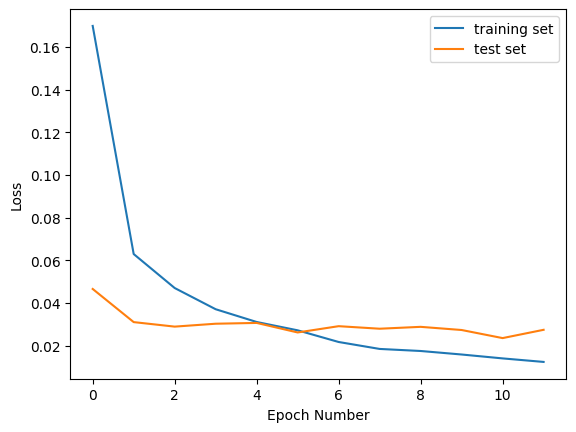

In [158]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

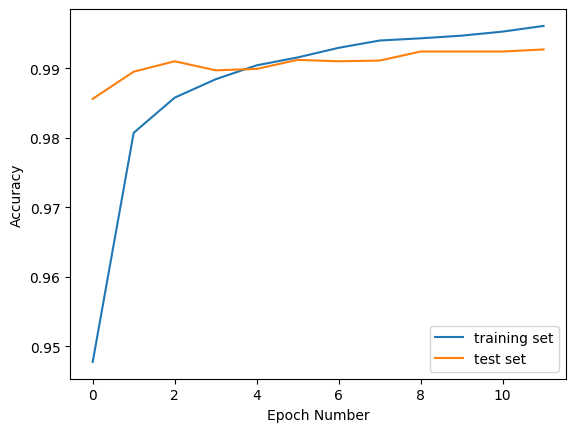

In [159]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [160]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [161]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.004838484339416027
Training accuracy:  0.9984166622161865


### Test set accuracy

In [162]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [163]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.027480853721499443
Validation accuracy:  0.9926999807357788


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model shuold be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [164]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [165]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [166]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

  1/313 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [167]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 15)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [168]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.864504e-15,1.435554e-12,2.091617e-12,5.596319e-11,5.385228e-13,4.056882e-13,4.234480e-22,1.000000e+00,2.240884e-13,7.978583e-12,6.753036e-23,1.419987e-21,1.139659e-23,1.379984e-22,2.110309e-22
1,6.464036e-13,2.375141e-12,1.000000e+00,1.550678e-19,5.710049e-19,5.740369e-24,2.220743e-12,1.615061e-17,6.577499e-17,1.268323e-19,1.798295e-28,3.996059e-28,6.445911e-29,2.534505e-27,2.774332e-28
2,2.938091e-12,9.999999e-01,1.311446e-10,1.903073e-16,7.846293e-08,6.040016e-11,3.666211e-10,4.457098e-10,2.569554e-09,4.040175e-11,4.965240e-17,2.904985e-17,8.442164e-17,4.234959e-17,1.061659e-16
3,9.999964e-01,1.599037e-13,2.317576e-10,7.467387e-13,5.812682e-12,5.173963e-11,3.629674e-06,1.047733e-13,1.488922e-11,8.315773e-09,2.582743e-17,6.195630e-17,4.950112e-17,2.949787e-17,1.094412e-17
4,8.490816e-14,1.462013e-11,3.086178e-12,1.202824e-17,9.999998e-01,4.826048e-15,3.684006e-15,3.098162e-16,2.446864e-12,1.934881e-07,9.044011e-22,4.070335e-21,3.420278e-21,1.122896e-20,4.967201e-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.596937e-16,2.232970e-13,1.000000e+00,1.094587e-16,3.485974e-18,3.249227e-23,1.598586e-16,1.377864e-13,1.017972e-12,6.370725e-19,2.146351e-27,1.369204e-27,1.042168e-27,3.776487e-27,2.458589e-27
9996,4.314929e-17,1.402548e-08,2.720170e-11,9.999999e-01,1.919939e-16,1.465282e-07,3.403992e-15,3.563047e-12,3.076612e-11,4.643205e-10,4.788664e-19,2.909474e-19,3.048929e-18,2.170567e-18,5.669396e-19
9997,2.090464e-20,2.590315e-13,7.601206e-19,7.928758e-21,1.000000e+00,9.283169e-15,3.952554e-17,4.605186e-16,3.006491e-10,8.284132e-11,2.769935e-26,1.671058e-25,3.312448e-26,3.433958e-26,8.717687e-26
9998,3.110004e-16,6.390165e-21,2.043027e-21,6.434926e-11,9.789696e-22,1.000000e+00,1.485497e-12,1.321122e-21,3.777265e-08,4.775596e-15,1.760918e-28,6.375558e-28,1.675083e-28,1.026528e-27,2.111083e-28


In [169]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [170]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

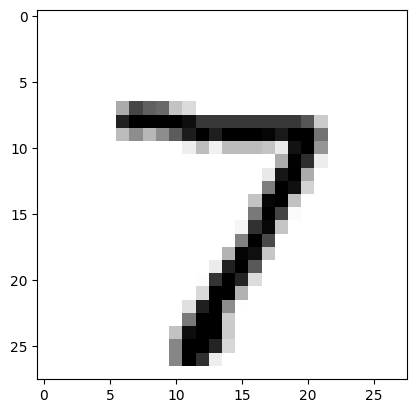

In [171]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

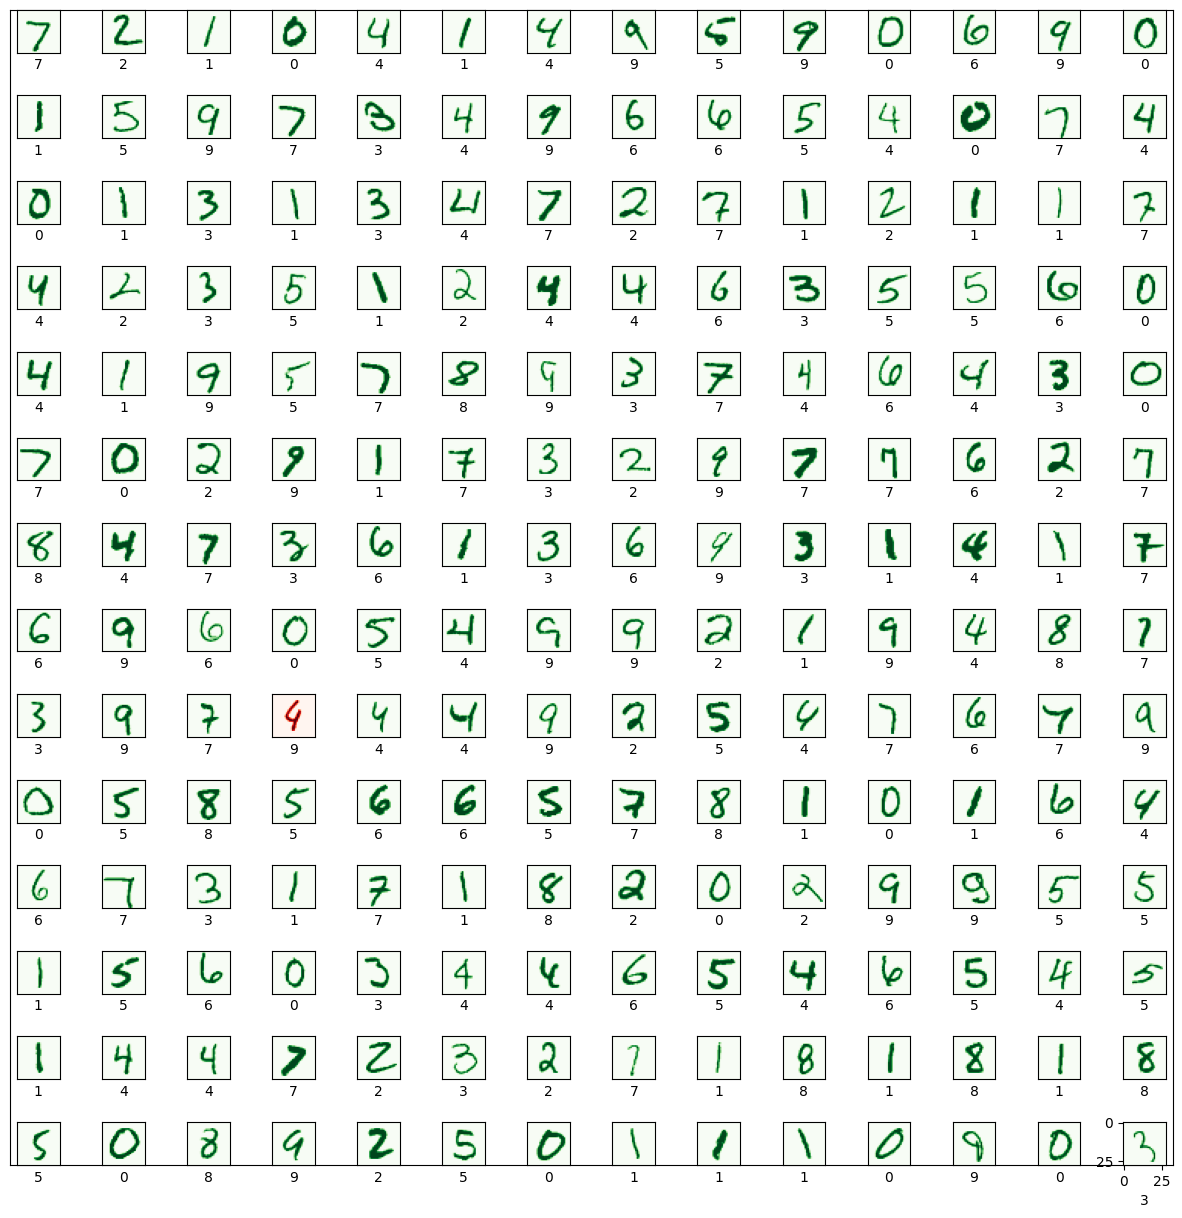

In [172]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

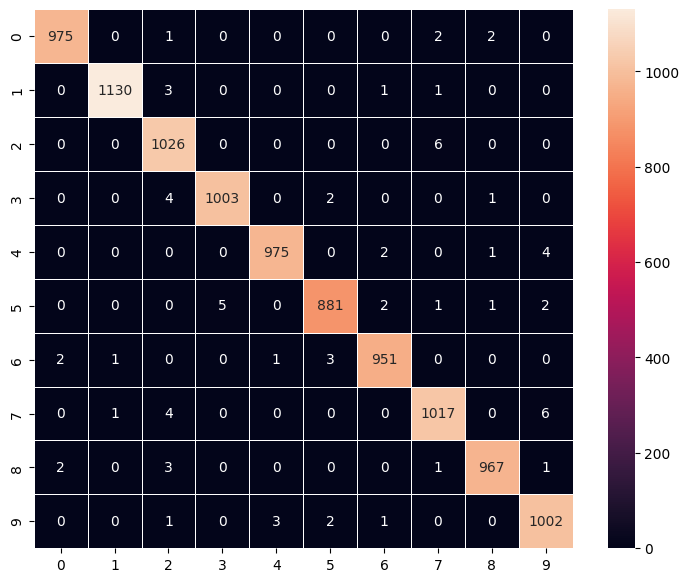

In [173]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

## Debugging the model with TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [174]:
%tensorboard --logdir .logs/fit

Reusing TensorBoard on port 6007 (pid 36592), started 4:36:30 ago. (Use '!kill 36592' to kill it.)

: 

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/digits_recognition_cnn/digits_recognition_cnn.h5 \
  ./demos/public/models/digits_recognition_cnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.